In [3]:
!pip install scikit-posthocs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df1 = pd.read_csv('csv_files/historical_data.csv')
df2 = pd.read_csv('csv_files/fear_greed_index.csv')

In [4]:
df1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


# Phase 1: Data Preparation & Exploration
  ### Step 1: Data Quality Assessment & Preprocessing

In [5]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

Column Description -
1. Historical Data (df1) ->
    1. **Account** -> Identifier of the trading account involved in the transaction (string).
    2. **Coin** -> Cryptocurrency symbol or name being traded (string).
    3. **Execution Price** -> The price at which the trade was executed, in USD or relevant currency (float).
    4. **Size Tokens** -> Quantity of cryptocurrency tokens involved in the trade (float).
    5. **Size USD** -> Dollar value (or fiat equivalent) of the trade size (float).
    6. **Side** -> Refers to the action taken by the trader (BUY / SELL)(string).
    7. **Timestamp IST** -> Timestamp of the trade in Indian Standard Time as string (may need parsing to datetime).
    8. **Start Position** -> Position size before the trade was executed (float).
    9. **Direction** -> Refers to the positional view or outcome of the trade (e.g., long/short) (string).
    10. **Closed PnL** -> Profit or loss realized from closed positions due to this trade (float).
    11. **Transaction Hash** -> Blockchain or system identifier for the transaction (string).
    12. **Order ID** -> Identifier for the order associated with this trade (integer).
    13. **Crossed** -> Boolean indicating if the trade crossed some threshold or condition (e.g., crossed spread).
    14. **Fee** -> Fee charged for executing the trade (float).
    15. **Trade ID** -> Unique identifier for the trade event (float, though ideally integer).
    16. **Timestamp** -> Numeric timestamp (likely UNIX epoch or similar float representation) when the trade happened.


2. Fear_Greed_Index data (df2) ->

    1. **timestamp** -> Numeric timestamp likely UNIX epoch, for the daily measurement (integer).
    2. **value** -> Numerical Fear & Greed index value representing market sentiment on a scale (integer).
    3. **classification** -> Qualitative classification of the index value, e.g., "Fear," "Greed," or "Neutral" (string).
    4. **date** -> Date string representing the day of the Fear & Greed index measurement.

In [6]:
df1.describe(include='all')

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,NaN,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12
std,NaN,NaN,29447.654868,1.042729e+05,3.657514e+04,NaN,NaN,6.738074e+05,NaN,919.164828,NaN,1.835753e+10,NaN,6.758854,3.257565e+14,8.689920e+09
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,NaN,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,NaN,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,NaN,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,NaN,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12


In [7]:
num_duplicates = df1.duplicated(subset=['Account', 'Size Tokens', 'Start Position', 'Transaction Hash']).sum()
print(f"Number of duplicate entries: {num_duplicates}")

# for i in df1.columns:
#   num_duplicates = df1.duplicated(subset=i).sum()
#   print(f"Number of duplicate {i} entries: {num_duplicates}")

Number of duplicate entries: 0


In [8]:
df1['Timestamp IST'] = pd.to_datetime(df1['Timestamp IST'], format='%d-%m-%Y %H:%M')
df1['date'] = df1['Timestamp IST'].dt.date
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

In [9]:
df1_trade_count = pd.DataFrame()
df1_trade_count['date'] = df1['Timestamp IST'].dt.date
df1_trade_count['hour'] = df1['Timestamp IST'].dt.hour

df1_trade_count[['date', 'hour']].value_counts().reset_index().sort_values(by='date',ascending=True).tail(20)

,date,hour,count
590,2025-04-30,23,90
2057,2025-04-30,12,20
317,2025-04-30,19,147
1487,2025-04-30,17,33
635,2025-04-30,0,83
362,2025-04-30,18,134
4609,2025-04-30,1,1
262,2025-05-01,1,171
2627,2025-05-01,11,12
230,2025-05-01,9,186


Observation ->
  1. Both the datasets are free of NULL values
  2. Date/timestamp columns need to be converted into datetime format
  3. Remove Unwanted columns -> ('Transaction Hash', 'Order ID', 'Trade ID')
  4. Looking at the mean, std, 75% -> Such a spread signals high volatility and risk due to these large outliers -> in ('Execution Price', 'Size
  Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee')
  
  (50% or 50 quantile ->shows median)
  5. The following four columns -> uniquely define each trade transactions in the historical data ->

      ['Account', 'Size Tokens', 'Start Position', 'Transaction Hash']

  6. Looking at the Timestamp IST -> the transactions within a day happen at random, inconsistent times rather than on a regular hourly basis

Creating Derived Matrix for analysis ->

To inlcude pct_change in our column for different traders
  1. Analyze the day trader perspective (10–20 day ROC)
  2. Analyze the swing trader perspective (40–60 day ROC)
  3. Analyze the long-term investor perspective (100–200 day ROC)

### Can apply Genetic Algorithm to get the best combination of ROC curves for different traders

By combining pct_change analysis with Genetic Algorithm optimization, it becomes possible to design adaptive, data-driven strategies that balance profitability and risk. pct_change captures the essential elements of volatility, momentum, and downside risk, while GA provides a optimal combinations of periods and adapt strategies dynamically to changing market conditions.

In [10]:
df_Exe_Price = df1.groupby(['date'])['Execution Price'].sum().reset_index()

In [11]:
df_Exe_Price

,date,Execution Price
0,2023-05-01,5.694400e+03
1,2023-12-05,9.934470e+04
2,2023-12-14,8.835056e+04
3,2023-12-15,5.964000e+00
4,2023-12-16,1.154120e+00
...,...,...
475,2025-04-27,4.426074e+06
476,2025-04-28,8.062895e+07
477,2025-04-29,6.403493e+07
478,2025-04-30,3.967767e+07


In [12]:
df_Exe_Price['pct_change_1day'] = df_Exe_Price['Execution Price'].pct_change(periods=24).shift(-24)
df_Exe_Price['pct_change_2day'] = df_Exe_Price['Execution Price'].pct_change(periods=24*2).shift(-24*2)
df_Exe_Price['pct_change_3day'] = df_Exe_Price['Execution Price'].pct_change(periods=24*3).shift(-24*3)
df_Exe_Price['pct_change_4day'] = df_Exe_Price['Execution Price'].pct_change(periods=24*4).shift(-24*4)
df_Exe_Price['pct_change_5day'] = df_Exe_Price['Execution Price'].pct_change(periods=24*5).shift(-24*5)
df_desc = df_Exe_Price.describe()

In [13]:
df_desc = df_desc.transpose().reset_index()

In [14]:
df_desc['sharpe_ratio'] = df_desc['mean'] / df_desc['std']
df_desc

,index,count,mean,min,25%,50%,75%,max,std,sharpe_ratio
0,date,480,2024-08-25 17:00:00,2023-05-01 00:00:00,2024-04-22 18:00:00,2024-08-25 12:00:00,2025-01-01 06:00:00,2025-05-01 00:00:00,NaN,NaN
1,Execution Price,480.0,5023049.010165,0.000015,26280.757793,377854.098469,3439294.628322,111569072.032501,13387075.174734,0.375216
2,pct_change_1day,456.0,269048345.05759,-1.0,-0.718488,0.434286,8.436289,102605333343.066666,4874048834.673553,0.0552
3,pct_change_2day,432.0,179372161.084,-1.0,-0.719743,0.902778,15.30527,45007599999.0,2522787487.574218,0.071101
4,pct_change_3day,408.0,235048561.620509,-1.0,-0.664242,1.643916,23.846992,48727286781.992668,3250844379.310308,0.072304
5,pct_change_4day,384.0,958674424.33543,-1.0,-0.387592,4.314023,33.875331,272411869069.027313,14667354094.999199,0.065361
6,pct_change_5day,360.0,2389520394.354178,-1.0,-0.179522,9.09911,66.101684,743885746865.400024,39612841088.754776,0.060322


To merge datasets on matching dates
So here is the deal as per our observation we have transaction made at random hours (and random intervals) of the day.

So grouping on the basis of transaction made daily.

In [15]:
agg_dict = {
    'Closed PnL': 'sum',
    'Execution Price': 'mean',
    'Size Tokens': 'sum',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Order ID': 'nunique',
    'Coin': 'nunique',
}
daily_trading = df1.groupby('date').agg(agg_dict)

In [16]:
# Unstacking Side column
df_Side = df1.groupby(['date', 'Side']).size().unstack(fill_value=0).reset_index()
df_Side.rename(columns={'BUY':'Side_buy', 'SELL':'Side_sell'}, inplace=True)
daily_trading = daily_trading.merge(df_Side, on='date')

In [17]:
# Unstacking Direction column
df_Direction = df1.groupby(['date', 'Direction']).size().unstack(fill_value=0).reset_index()
daily_trading = daily_trading.merge(df_Direction, on='date')

In [18]:
# Adding a coin group column
high_size = ['BTC', 'HYPE', 'SOL', '@107', 'FARTCOIN', 'SUI', 'TRUMP', 'MELANIA', 'ETH']


altcoin_majors = [ "BNB", "ADA", "AVAX", "MATIC", "DOT", "TRX", "LTC", "ATOM", "NEAR", "APT" ]
stablecoins = [ "USDT", "USDC", "USUAL", "PURR/USDC" ]
memecoins = [ "DOGE", "SHIB", "PEPE", "BONK", "WIF", "MEME", "POPCAT", "BRETT", "BOME" ]

def assign_coin_grp(coin):
  if coin in high_size:
    return coin
  elif coin in altcoin_majors:
    return "Alcoin Majors"
  elif coin in stablecoins:
    return "Stable Coins"
  elif coin in memecoins:
    return "Meme Coins"
  elif coin.startswith('@'):
    return "Sythetic"
  else:
    return "Other Altcoins"

df1['coin_grp'] = df1['Coin'].apply(assign_coin_grp)
df1_coin_grp = df1.groupby(['date', 'coin_grp']).size().unstack(fill_value=0).reset_index()
daily_trading = daily_trading.merge(df1_coin_grp, on='date')

In [19]:
# merging the fear_greed_index dataset
daily_trading = daily_trading.merge(df2[['date', 'value', 'classification']], on='date')

In [20]:
daily_trading = daily_trading.set_index('date')

In [21]:
daily_trading

,Closed PnL,Execution Price,Size Tokens,Size USD,Fee,Order ID,Coin,Side_buy,Side_sell,Auto-Deleveraging,...,MELANIA,Meme Coins,Other Altcoins,SOL,SUI,Stable Coins,Sythetic,TRUMP,value,classification
date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,0.000000,1898.133333,2.513000e-01,477.00,0.000000,1,1,3,0,0,...,0,0,0,0,0,0,0,0,63,Greed
2023-12-05,0.000000,11038.300000,1.180901e+01,50005.83,12.501455,2,2,7,2,0,...,0,0,0,0,0,0,0,0,75,Extreme Greed
2023-12-14,-205.434737,8031.868818,4.092289e+03,113203.35,28.300831,5,4,5,6,0,...,0,0,8,0,0,0,0,0,72,Greed
2023-12-15,-24.632034,2.982000,3.558000e+03,10609.95,2.652489,1,1,2,0,0,...,0,0,2,0,0,0,0,0,70,Greed
2023-12-16,0.000000,0.384707,3.989700e+04,15348.77,3.837189,1,1,3,0,0,...,0,0,3,0,0,0,0,0,67,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-27,2702.067468,13133.751885,3.887430e+06,487537.69,55.926773,63,16,209,128,0,...,12,0,104,0,5,0,47,0,61,Greed
2025-04-28,36906.813759,58469.141862,2.152493e+05,26124921.49,6007.251404,199,14,652,727,0,...,0,1,65,0,0,0,155,0,54,Neutral
2025-04-29,125749.613427,28548.785993,2.974820e+05,34089511.66,5149.295287,259,17,1105,1138,0,...,0,3,124,390,0,0,72,0,60,Greed


### Step 2 : Exploratory Data Analysis

To understand the distribution and characteristic of each datasets

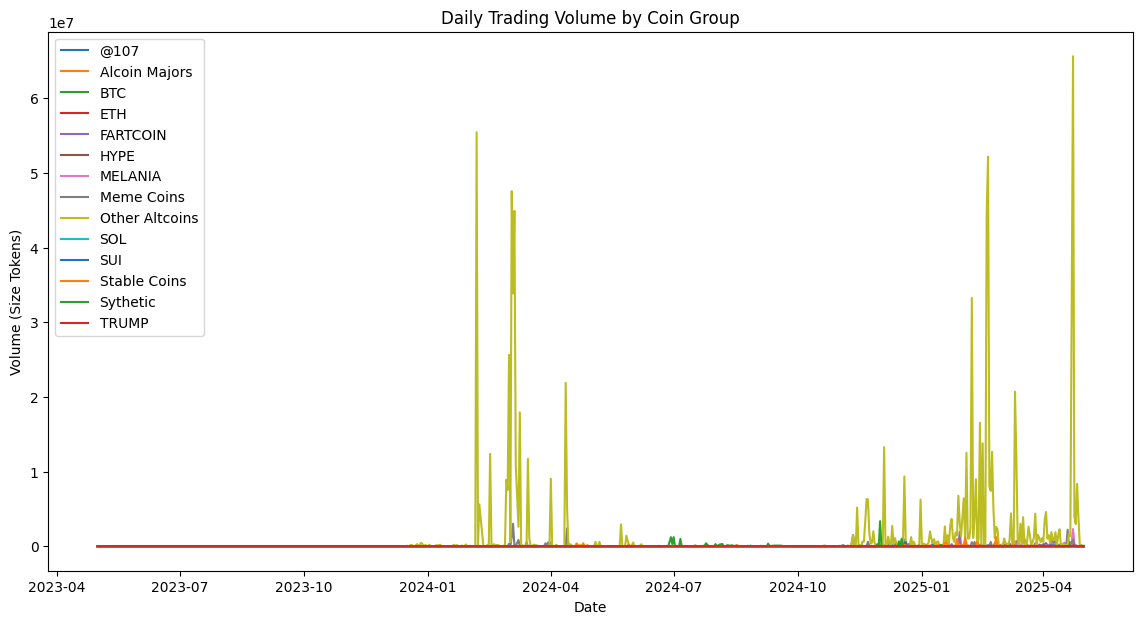

In [22]:
# Aggregate daily trading volume by coin group
daily_volume = df1.groupby(['date', 'coin_grp'])['Size Tokens'].sum().reset_index()

# Pivot for easier plotting
volume_pivot = daily_volume.pivot(index='date', columns='coin_grp', values='Size Tokens').fillna(0)

# Plot volume trends for major coin groups over time
plt.figure(figsize=(14, 7))
for coin_group in volume_pivot.columns:
    plt.plot(volume_pivot.index, volume_pivot[coin_group], label=coin_group)
plt.title('Daily Trading Volume by Coin Group')
plt.xlabel('Date')
plt.ylabel('Volume (Size Tokens)')
plt.legend()
plt.show()

In [23]:
df1['Coin'].value_counts().head(15)

Coin
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
TRUMP         1920
XRP           1774
kPEPE         1730
kBONK         1647
FTT           1560
Name: count, dtype: int64

In [24]:
df1.groupby(['Coin'])['Size USD'].sum().sort_values(ascending=False).reset_index().head(10)['Coin'].to_list()

['BTC',
 'HYPE',
 'SOL',
 'ETH',
 '@107',
 'FARTCOIN',
 'SUI',
 'TRUMP',
 'MELANIA',
 'XRP']

Why separately?

Each coin behaves differently with unique liquidity, market cycles, and trader interest.
Analyzing coins individually helps you spot coin-specific volume spikes, trends, and anomalies.

1. Compare Rolling Means across Different Windows - on 'Execution **Price**'

    (7-day, 14-day, 30-day) to capture short and medium-term trends

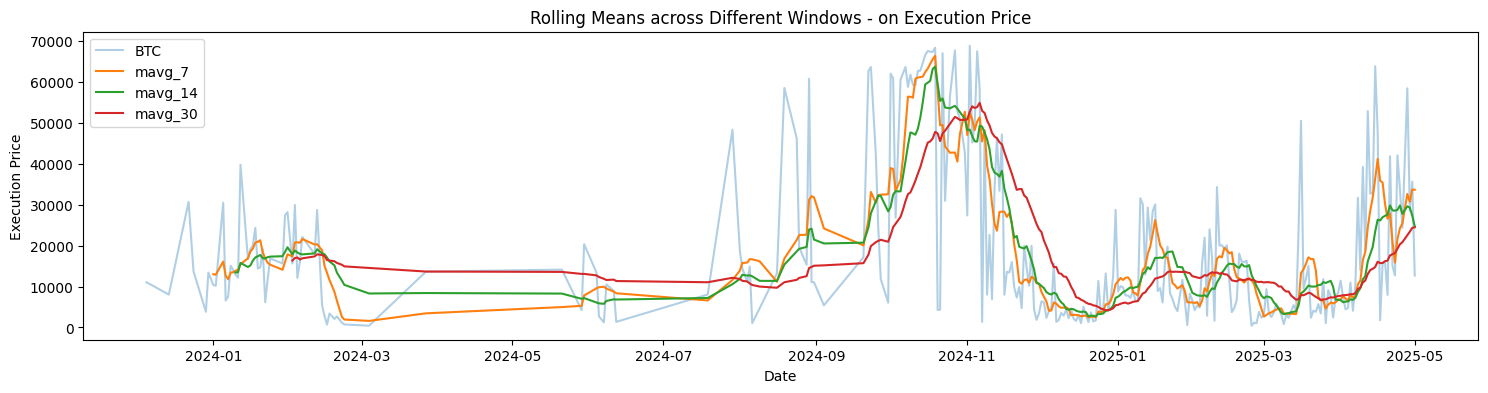

In [25]:
# Bitcoin
df_coin = daily_trading[daily_trading['BTC']>0]['Execution Price']

MAVG_7 = df_coin.rolling(window=7).mean()
MAVG_14 = df_coin.rolling(window=14).mean()
MAVG_30 = df_coin.rolling(window=30).mean()
plt.figure(figsize=(18,4))
plt.plot(df_coin.index, df_coin.values, alpha=0.35)
plt.plot(MAVG_7.index, MAVG_7.values)
plt.plot(MAVG_14.index, MAVG_14.values)
plt.plot(MAVG_30.index, MAVG_30.values)
plt.title('Rolling Means across Different Windows - on Execution Price')
plt.xlabel('Date')
plt.ylabel('Execution Price')
plt.legend(['BTC','mavg_7','mavg_14', 'mavg_30'])

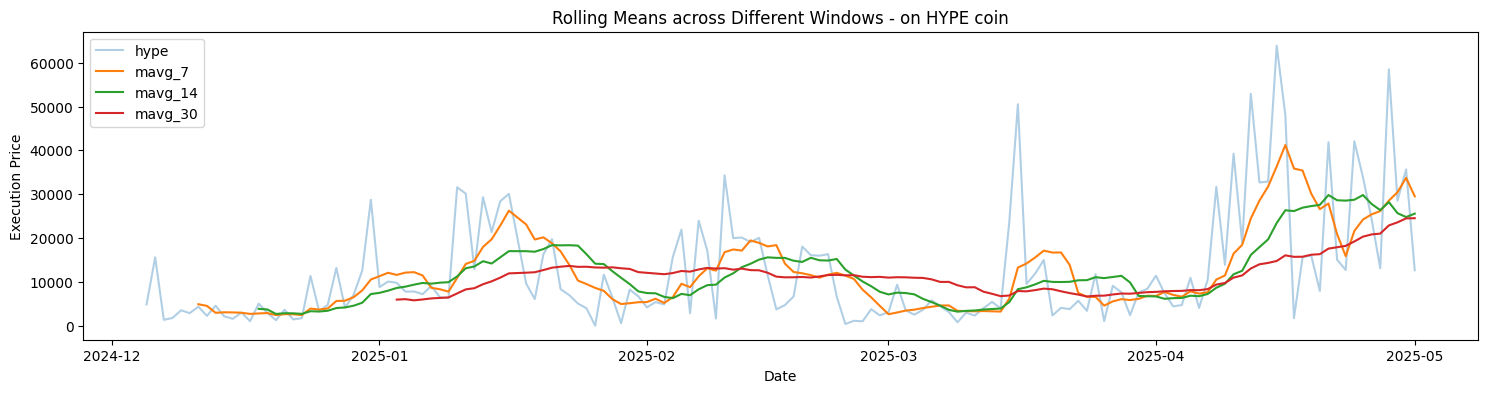

In [26]:
# HYPE coin
df_hype = daily_trading[daily_trading['HYPE']>0]['Execution Price']

MAVG_7 = df_hype.rolling(window=7).mean()
MAVG_14 = df_hype.rolling(window=14).mean()
MAVG_30 = df_hype.rolling(window=30).mean()

plt.figure(figsize=(18,4))
plt.plot(df_hype.index, df_hype.values, alpha=0.35)
plt.plot(MAVG_7.index, MAVG_7.values)
plt.plot(MAVG_14.index, MAVG_14.values)
plt.plot(MAVG_30.index, MAVG_30.values)
plt.title('Rolling Means across Different Windows - on HYPE coin')
plt.xlabel('Date')
plt.ylabel('Execution Price')
plt.legend(['hype','mavg_7','mavg_14', 'mavg_30'])

Plotting rolling mean of popular coins based on 'Execution Price'


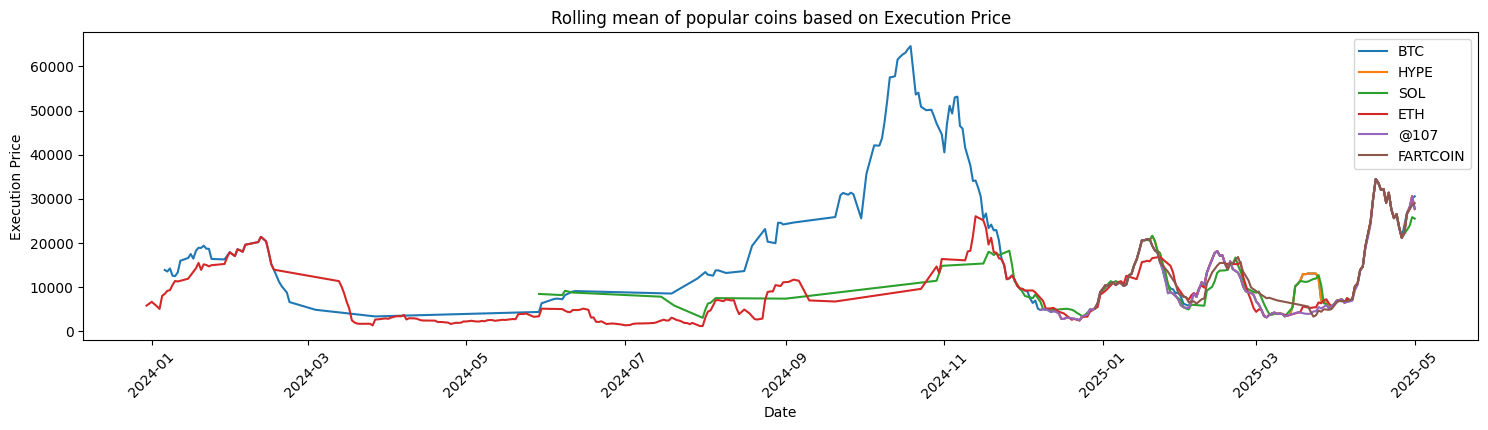

In [27]:
# Analyze trading volume patterns by coin and date
lst = ['BTC','HYPE','SOL','ETH','@107','FARTCOIN']
w_size=10
plt.figure(figsize=(18,4))
for i in lst:
  df_coin = daily_trading[daily_trading[i] > 0]['Execution Price']
  MAVG_coin = df_coin.rolling(window = w_size).mean()
  plt.plot(MAVG_coin.index, MAVG_coin.values)

plt.title('Rolling mean of popular coins based on Execution Price')
plt.xlabel('Date')
plt.ylabel('Execution Price')
plt.xticks(rotation = 45)
plt.legend(lst)

2. Compare Rolling Means across Different Windows - 'Size USD'

    (7-day, 14-day, 30-day) to capture short and medium-term trends

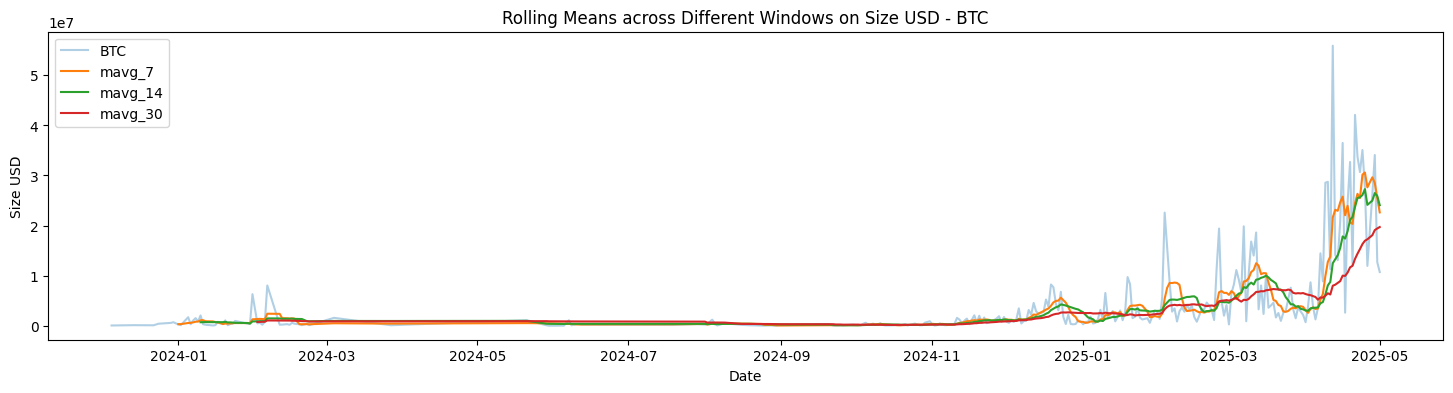

In [28]:
# Bitcoin
df_coin = daily_trading[daily_trading['BTC']>0]['Size USD']

MAVG_7 = df_coin.rolling(window=7).mean()
MAVG_14 = df_coin.rolling(window=14).mean()
MAVG_30 = df_coin.rolling(window=30).mean()
plt.figure(figsize=(18,4))
plt.plot(df_coin.index, df_coin.values, alpha=0.35)
plt.plot(MAVG_7.index, MAVG_7.values)
plt.plot(MAVG_14.index, MAVG_14.values)
plt.plot(MAVG_30.index, MAVG_30.values)
plt.title('Rolling Means across Different Windows on Size USD - BTC')
plt.xlabel('Date')
plt.ylabel('Size USD')
plt.legend(['BTC','mavg_7','mavg_14', 'mavg_30'])

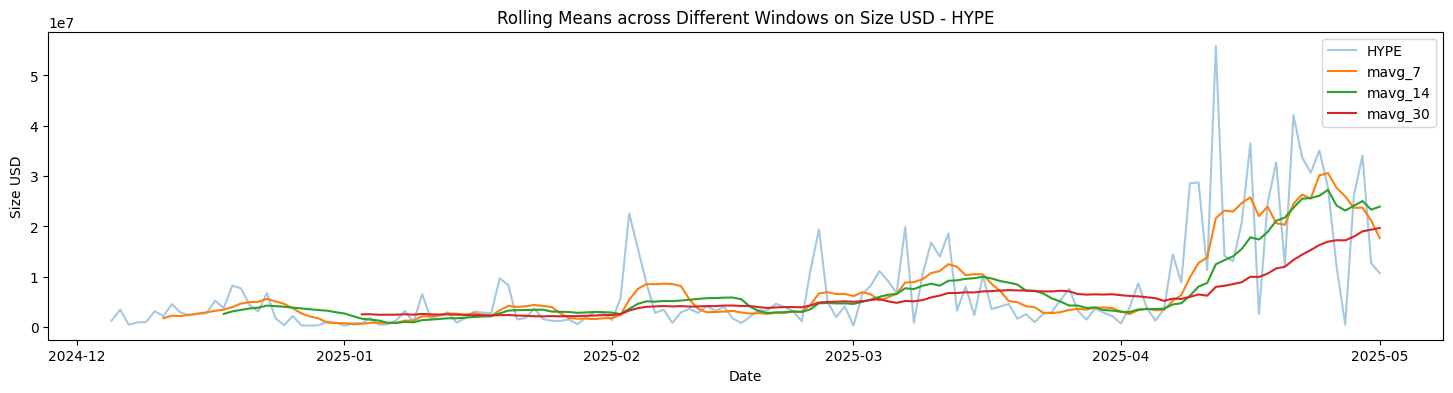

In [29]:
# HYPE coin
df_coin = daily_trading[daily_trading['HYPE']>0]['Size USD']

MAVG_7 = df_coin.rolling(window=7).mean()
MAVG_14 = df_coin.rolling(window=14).mean()
MAVG_30 = df_coin.rolling(window=30).mean()
plt.figure(figsize=(18,4))
plt.plot(df_coin.index, df_coin.values, alpha=0.4)
plt.plot(MAVG_7.index, MAVG_7.values)
plt.plot(MAVG_14.index, MAVG_14.values)
plt.plot(MAVG_30.index, MAVG_30.values)
plt.title('Rolling Means across Different Windows on Size USD - HYPE')
plt.xlabel('Date')
plt.ylabel('Size USD')
plt.legend(['HYPE','mavg_7','mavg_14', 'mavg_30'])

Plotting rolling mean of popular coins based on 'Size USD'

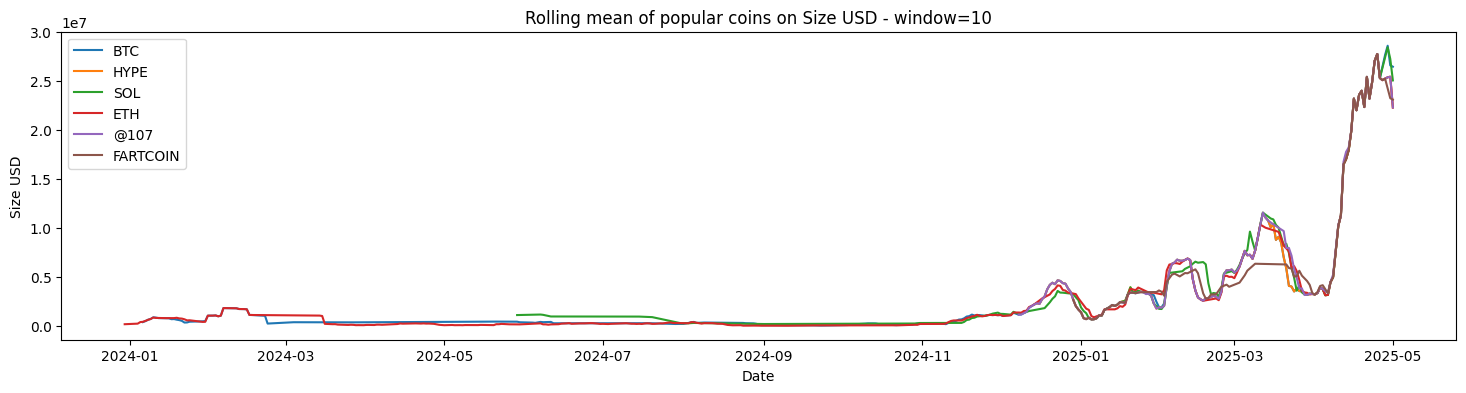

In [30]:
# Analyze trading volume patterns by coin and date
lst = ['BTC','HYPE','SOL','ETH','@107','FARTCOIN']
w_size=10
plt.figure(figsize=(18,4))
for i in lst:
  df_coin = daily_trading[daily_trading[i] > 0]['Size USD']
  MAVG_coin = df_coin.rolling(window = w_size).mean()
  plt.plot(MAVG_coin.index, MAVG_coin.values)

plt.title(f'Rolling mean of popular coins on Size USD - window={w_size}')
plt.xlabel('Date')
plt.ylabel('Size USD')
plt.legend(lst)

3. Examine Fear & Greed Index distribution over time

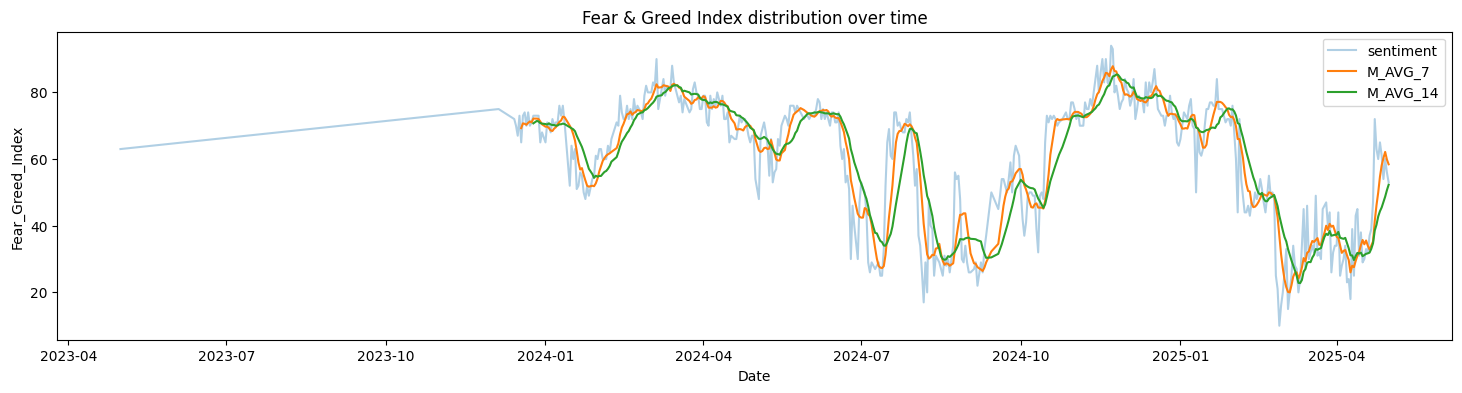

In [31]:
# Analyze trading volume patterns by fear_greed and date
df_sentiment = daily_trading['value']
M_AVG_7 = df_sentiment.rolling(window=7).mean()
M_AVG_14 = df_sentiment.rolling(window=14).mean()
plt.figure(figsize=(18,4))
plt.plot(df_sentiment.index, df_sentiment.values, alpha=0.35)
plt.plot(M_AVG_7.index, M_AVG_7.values)
plt.plot(M_AVG_14.index, M_AVG_14.values)
plt.title('Fear & Greed Index distribution over time')
plt.xlabel('Date')
plt.ylabel('Fear_Greed_Index')
plt.legend(['sentiment', 'M_AVG_7', 'M_AVG_14'])

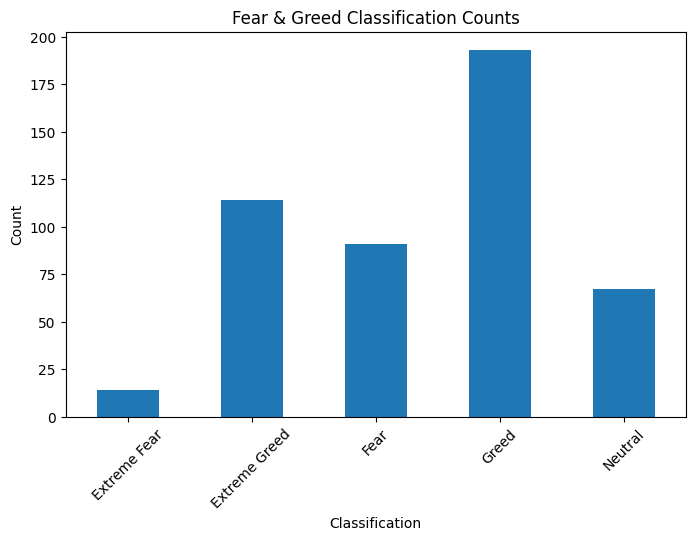

In [32]:
df_classification = daily_trading.groupby('classification')['Closed PnL'].count()
df_classification.plot(kind='bar', figsize=(8,5))
plt.title('Fear & Greed Classification Counts')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4. To analyze how market sentiment (measured by the Fear & Greed Index) influences coin prices and trading volumes

In [33]:
fg_value_min = df2.groupby(['classification']).agg({'value':'min'}).reset_index()
fg_value_max = df2.groupby(['classification']).agg({'value':'max'}).reset_index()
fg_value_min.merge(fg_value_max, on='classification').sort_values(by='value_x', ascending=True).rename(columns={'value_x':'min', 'value_y':'max'})

,classification,min,max
0,Extreme Fear,5,24
2,Fear,25,44
4,Neutral,45,54
3,Greed,55,74
1,Extreme Greed,75,95


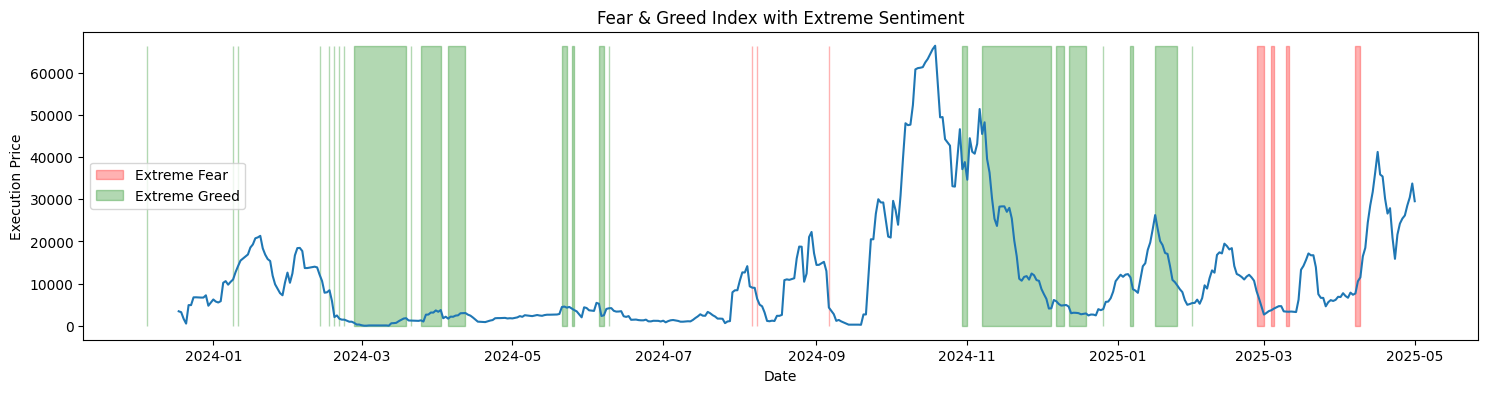

In [34]:
# Plotting the sentiment-shaded Execution price

plt.figure(figsize=(18,4))

# Execution Price rolling mean
df_price = df1.groupby(['date']).agg({'Execution Price':'mean'}).rolling(window=7).mean().reset_index()
fg_index = df_price.merge(df2[['date','classification']])

high = df_price['Execution Price'].max()
plt.plot(df_price['date'], df_price['Execution Price'])
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment')
plt.xlabel('Date')
plt.ylabel('Execution Price')
plt.legend()
plt.show()


### Observation -
The 7-day rolling mean of Execution Price

  1. During Extreme Greed - It shows that in initial months the prices were showing a upward trend but in recent months it has gradually shown an downward trend, with fluctuations in between, rather than the expected sharp upward rallies.

  2. During Extreme Fear - Its expected that Prices tend to fall or stay depressed as many traders sell off positions, which is true in our case while in last month observation it show an upward trend.

  - The raw execution price is noisy, but can be explored for anomalies.

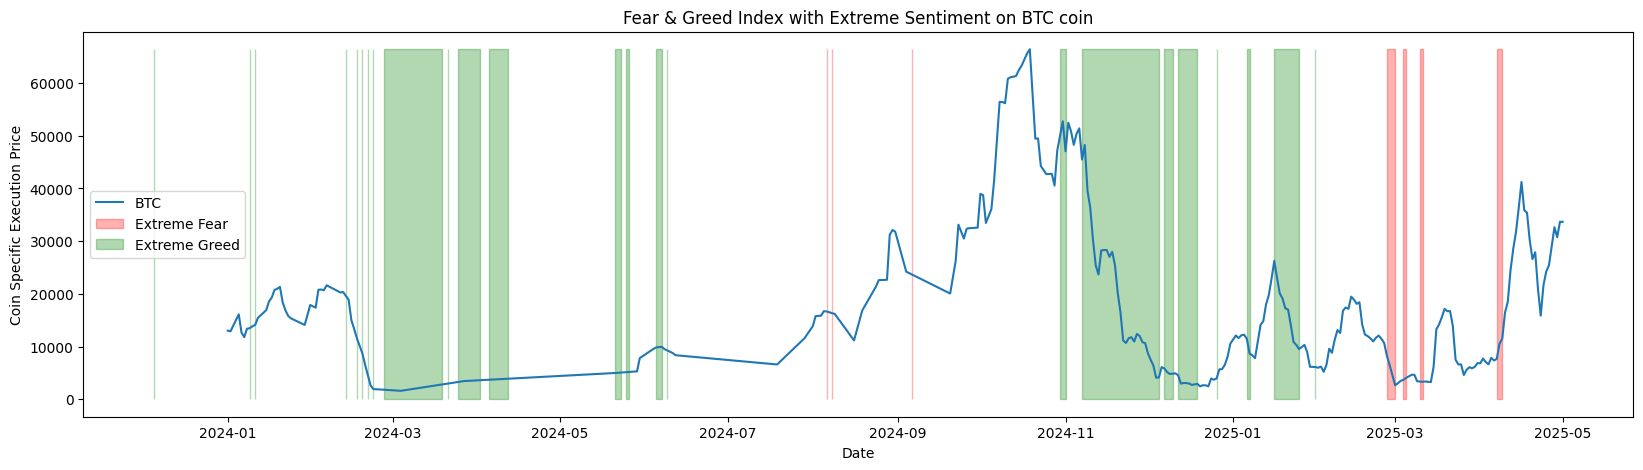

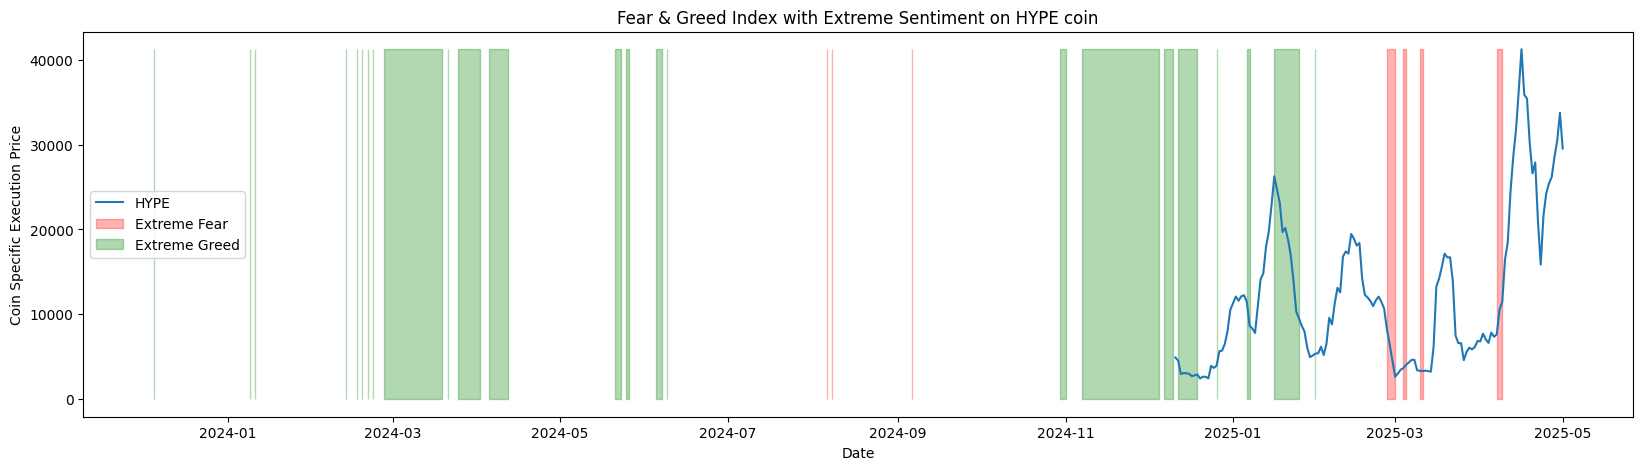

In [35]:
df_coin = daily_trading['Execution Price'].rolling(window=7).sum()


# Plotting the sentiment-shaded Execution price for BTC coin_specific

plt.figure(figsize=(20,5))
# coin specific rolling mean
MAVG_14_coin = daily_trading[daily_trading['BTC']>0][['Execution Price']].rolling(window=7).mean()
plt.plot(MAVG_14_coin.index, MAVG_14_coin.values, label='BTC')

high = MAVG_14_coin['Execution Price'].max()

fg_index = df_coin.reset_index().merge(df2[['date', 'classification']], on='date')
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment on BTC coin')
plt.xlabel('Date')
plt.ylabel('Coin Specific Execution Price')
plt.legend()
plt.show()





# Plotting the sentiment-shaded Execution price for HYPE coin_specific

plt.figure(figsize=(20,5))
# coin specific rolling mean
MAVG_14_coin = daily_trading[daily_trading['HYPE']>0][['Execution Price']].rolling(window=7).mean()
plt.plot(MAVG_14_coin.index, MAVG_14_coin.values, label='HYPE')

high = MAVG_14_coin['Execution Price'].max()

fg_index = df_coin.reset_index().merge(df2[['date', 'classification']], on='date')
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment on HYPE coin')
plt.xlabel('Date')
plt.ylabel('Coin Specific Execution Price')
plt.legend()
plt.show()

### Observation -
  The 7-day rolling mean of Execution Price (Individual coin Analysis)

  1. During Extreme Greed - Initially the BTC shows upward trend but after November 2024 both the Bitcoin and HYPE coin has been showing a downward trend with fluctuation in between.
  2. During Extreme Fear - Both HYPE and BTC are going downward (matching our expectation) , but trade prices in April 2025 has the moving average showing an upward trend.

  

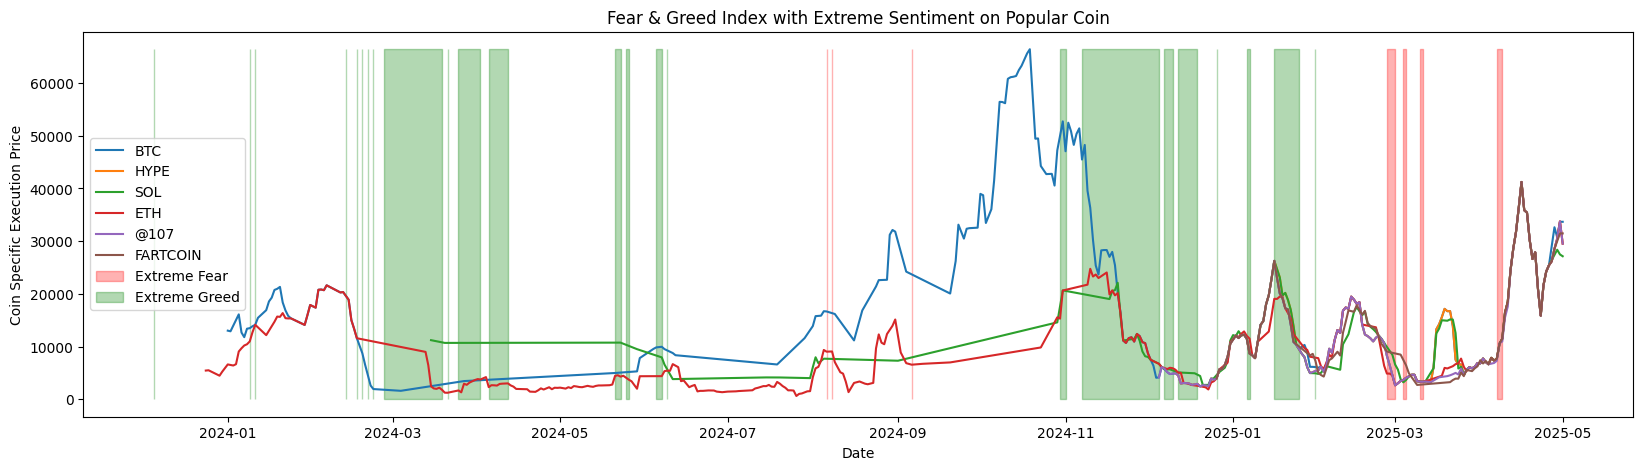

In [36]:
# Plotting the sentiment-shaded Execution price - including popular coins

df_coin = daily_trading['Execution Price'].rolling(window=7).sum()
lst = ['BTC','HYPE','SOL','ETH','@107','FARTCOIN']
plt.figure(figsize=(20,5))
high = 0
for i in lst:
  # coin specific rolling mean
  MAVG_14_coin = daily_trading[daily_trading[i]>0][['Execution Price']].rolling(window=7).mean()
  plt.plot(MAVG_14_coin.index, MAVG_14_coin.values, label=f'{i}')

  if high < MAVG_14_coin['Execution Price'].max():
    high = MAVG_14_coin['Execution Price'].max()

fg_index = df_coin.reset_index().merge(df2[['date', 'classification']], on='date')
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment on Popular Coin')
plt.xlabel('Date')
plt.ylabel('Coin Specific Execution Price')
plt.legend()
plt.show()


### Observation -
  Plotted some popular coin price distribution
  1. From September 2024 it can be seen that most of the popular coins are following the similar trends and the sentiment is most likely the same as observed in the individual coins.
  2. Between June 2024 to October 2024 it can be seen that the ETH, SOL coins have been following the trends of the BTC with smaller magnitude. (Showcasing that a spike in BTC price had effect on the other coins too)

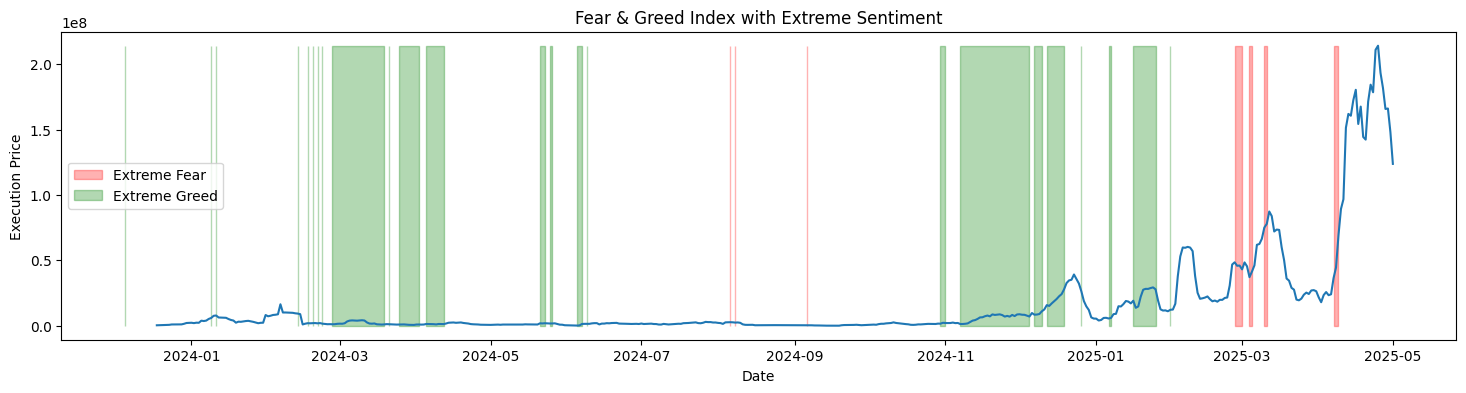

In [37]:
# Plotting the sentiment-shaded Size USD

plt.figure(figsize=(18,4))

# Execution Price rolling mean
df_price = df1.groupby(['date']).agg({'Size USD':'sum'}).rolling(window=7).sum().reset_index()
fg_index = df_price.merge(df2[['date','classification']])

high = df_price['Size USD'].max()
plt.plot(df_price['date'], df_price['Size USD'])
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment')
plt.xlabel('Date')
plt.ylabel('Execution Price')
plt.legend()
plt.show()


### Observation -
  The 7-day rolling mean of Size USD
  1. During Extreme Greed - It could be seen that the Size USD factor actually follows the upward trend throughout the years.
  2. During Extreme Fear - It can be seen that in the end of the february the it was following the downward trend but moving on further Extereme fear region the moving average result was mostly an upward trend.

  - The raw Size USD is noisy, and yes it did have an downward trend in it but thorughout the Extreme Fear period the avg trend was moving upwards.

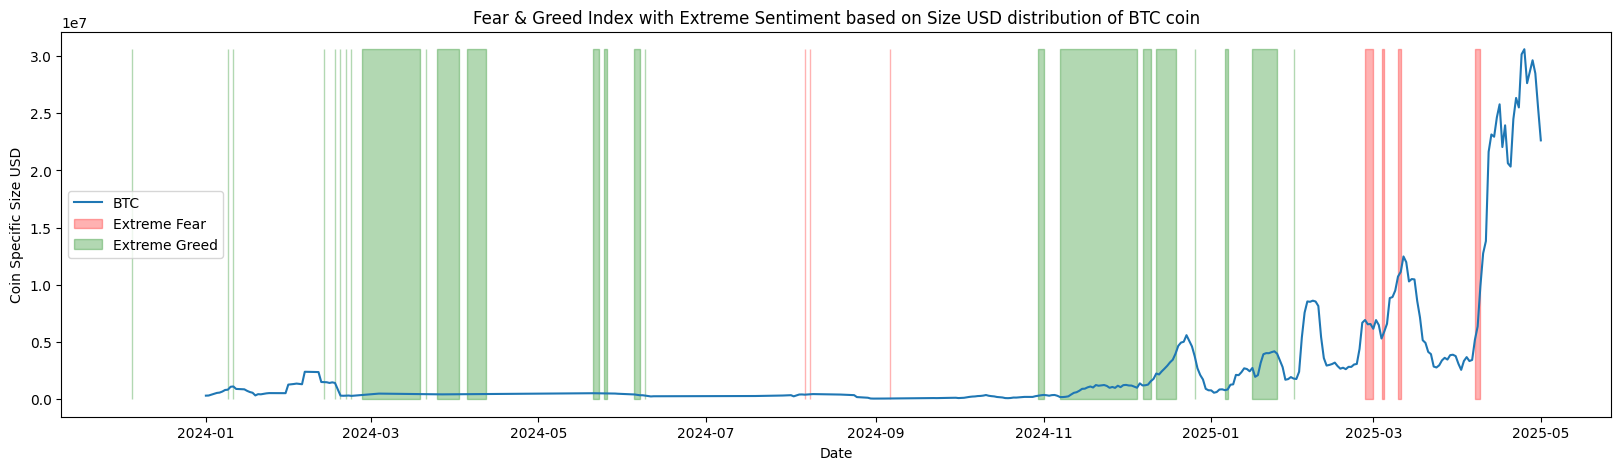

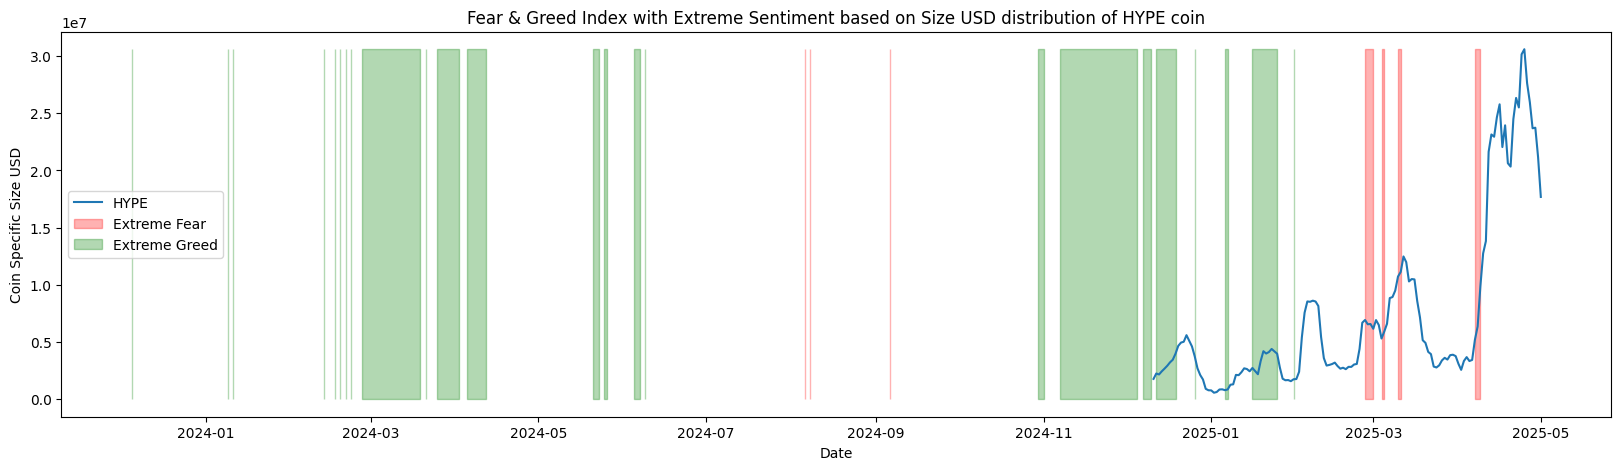

In [38]:
df_coin = daily_trading['Size USD'].rolling(window=7).sum()


# Plotting the sentiment-shaded Size USD for BTC coin_specific

plt.figure(figsize=(20,5))
# coin specific rolling mean
MAVG_14_coin = daily_trading[daily_trading['BTC']>0][['Size USD']].rolling(window=7).mean()
plt.plot(MAVG_14_coin.index, MAVG_14_coin.values, label='BTC')

high = MAVG_14_coin['Size USD'].max()

fg_index = df_coin.reset_index().merge(df2[['date', 'classification']], on='date')
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment based on Size USD distribution of BTC coin')
plt.xlabel('Date')
plt.ylabel('Coin Specific Size USD')
plt.legend()
plt.show()





# Plotting the sentiment-shaded Size USD for HYPE coin_specific

plt.figure(figsize=(20,5))
# coin specific rolling mean
MAVG_14_coin = daily_trading[daily_trading['HYPE']>0][['Size USD']].rolling(window=7).mean()
plt.plot(MAVG_14_coin.index, MAVG_14_coin.values, label='HYPE')

high = MAVG_14_coin['Size USD'].max()

fg_index = df_coin.reset_index().merge(df2[['date', 'classification']], on='date')
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment based on Size USD distribution of HYPE coin')
plt.xlabel('Date')
plt.ylabel('Coin Specific Size USD')
plt.legend()
plt.show()

### Observation -
  The 7-day rolling mean of Coin specific Size USD distribution
  1. During Extreme Greed - It could be seen that the Size USD factor actually follows the upward trend throughout the years for both the coins.
  2. During Extreme Fear - It can be seen that in the end of the february the it was following the downward trend but moving on further Extereme fear region the moving average result was mostly an upward trend for both the coins.

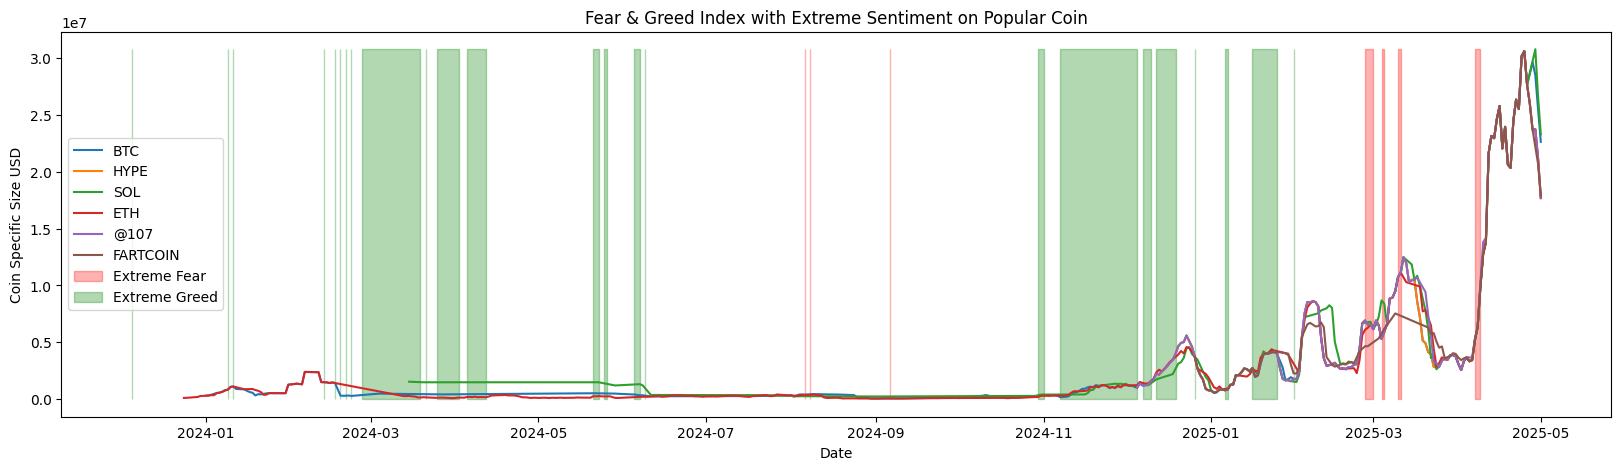

In [39]:
# Plotting the sentiment-shaded Size USD - including popular coins

df_coin = daily_trading['Size USD'].rolling(window=7).sum()
lst = ['BTC','HYPE','SOL','ETH','@107','FARTCOIN']
plt.figure(figsize=(20,5))
high = 0
for i in lst:
  # coin specific rolling mean
  MAVG_14_coin = daily_trading[daily_trading[i]>0][['Size USD']].rolling(window=7).mean()
  plt.plot(MAVG_14_coin.index, MAVG_14_coin.values, label=f'{i}')

  if high < MAVG_14_coin['Size USD'].max():
    high = MAVG_14_coin['Size USD'].max()

fg_index = df_coin.reset_index().merge(df2[['date', 'classification']], on='date')
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')

# Highlight extreme greed periods
plt.fill_between(fg_index['date'], 0, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment on Popular Coin')
plt.xlabel('Date')
plt.ylabel('Coin Specific Size USD')
plt.legend()
plt.show()


### Observation -
  1. It can be seen that most of the popular coins are following the trend throughout the year.
  2. Based on the sentiment the popular coins have the similar reaction as the individual for extreme sentiment.

  - The SOL coin is having an unusal behaviour compared to other coins
  - And the FARTCOIN in March 2025 the value of it was comparatively lower than other coins.

In [40]:
daily_coin_data = df1.groupby(['date', 'Coin'])[['Execution Price', 'Size USD']].agg({'Execution Price':'mean', 'Size USD':'sum'}).reset_index()
combined = df2[['date', 'value', 'classification']].merge(daily_coin_data, on='date')
combined

,date,value,classification,Coin,Execution Price,Size USD
0,2023-05-01,63,Greed,ETH,1898.133333,477.00
1,2023-12-05,75,Extreme Greed,BTC,41866.500000,24998.62
2,2023-12-05,75,Extreme Greed,ETH,2230.242857,25007.21
3,2023-12-14,72,Greed,AAVE,99.217833,51839.62
4,2023-12-14,72,Greed,BTC,42748.500000,25525.84
...,...,...,...,...,...,...
5067,2025-05-01,53,Neutral,PURR,0.114493,749.28
5068,2025-05-01,53,Neutral,SOL,147.705803,7633697.15
5069,2025-05-01,53,Neutral,SUI,3.487300,92.06
5070,2025-05-01,53,Neutral,VIRTUAL,1.630100,1110.75


In [41]:
combined.describe()

,date,value,Execution Price,Size USD
count,5072,5072.000000,5072.000000,5.072000e+03
mean,2024-12-13 10:07:17.223974912,59.601144,5207.837696,2.348381e+05
min,2023-05-01 00:00:00,10.000000,0.000005,0.000000e+00
25%,2024-11-30 00:00:00,45.000000,0.358870,4.997200e+02
50%,2025-01-10 00:00:00,69.000000,2.047568,2.777045e+03
75%,2025-02-26 00:00:00,75.000000,21.688410,4.451251e+04
max,2025-05-01 00:00:00,94.000000,107008.400000,5.310785e+07
std,NaN,19.780087,19795.844910,1.697303e+06


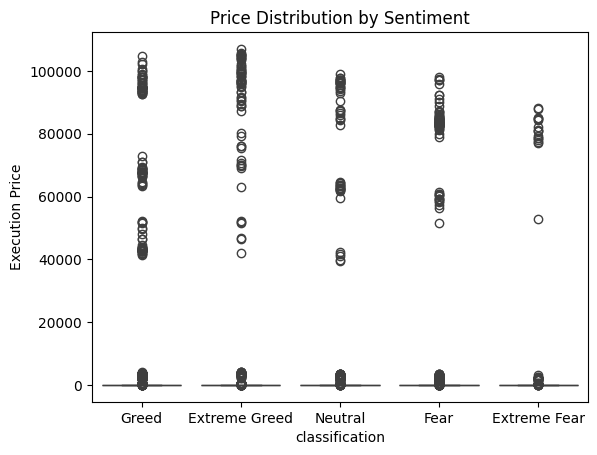

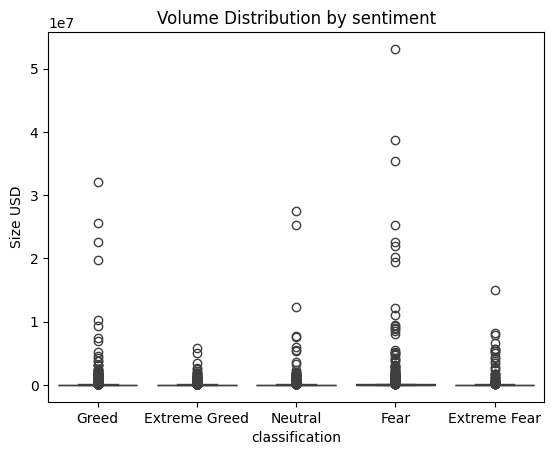

In [42]:
sns.boxplot(data=combined, x='classification', y='Execution Price')
plt.title('Price Distribution by Sentiment')
plt.show()

sns.boxplot(data=combined, x='classification', y='Size USD')
plt.title('Volume Distribution by sentiment')
plt.show()

### Observations -
  Looking at the statistical description of Execution Price & Size USD -

Execution Price -
  1. The mean value(≈ 5208) is way above the Q3(≈ 20) indicating extreme outliers.
  2. Positive Skewness - Median (2.04) << Mean (5207) → strong right skew, so most trades are at low execution prices, but a few very high trades push the average.
  3. Extreme Volatility - Standard deviation (≈ 19,795) is ~4× the mean (≈ 5,207).
  4. Highly Dispersive - Most trades are at very low values (median ≈ 2), but the range extends up to 107,008.
This huge gap → extreme dispersion (spread).

This implies the market is populated with low-value(low Execution Price) coins, with occasional high-value trades creating distortion.

Size USD
  1. The mean (≈ 234,838) is far above the 75th percentile (≈ 44,512) → presence of extreme outliers.
  2. Positive Skewness: Median (≈ 2,777) << Mean (≈ 234,838) → strong right skew. Most trades involve small USD notional sizes, but a few very large trades drag the average up.
  3. Extreme Volatility: Standard deviation (≈ 1,697,303) is ~7× the mean (≈ 234,838) → highly unstable trade sizes, with occasional very large notional trades.
  4. High Dispersion: Majority of trades are in the hundreds to low-thousands of USD (25% ≈ 500, 50% ≈ 2,777), but the range extends up to 53 million USD.

This massive spread indicates a mix of retail-like small trades and institutional-scale block trades.


   - Volatility = how much prices/trade sizes swing across time.
   - Dispersion = how much prices/trade sizes are spread across trades.

## Analysing Closed PnL column

Testing whether it follows a Normal distribution or not.

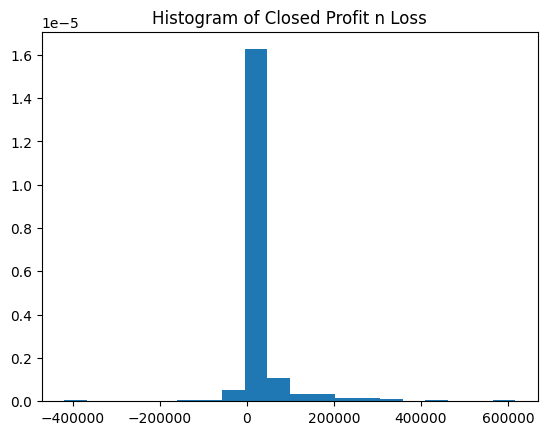

In [43]:
plt.hist(daily_trading['Closed PnL'], bins=20, density=True)
plt.title('Histogram of Closed Profit n Loss')
plt.show()

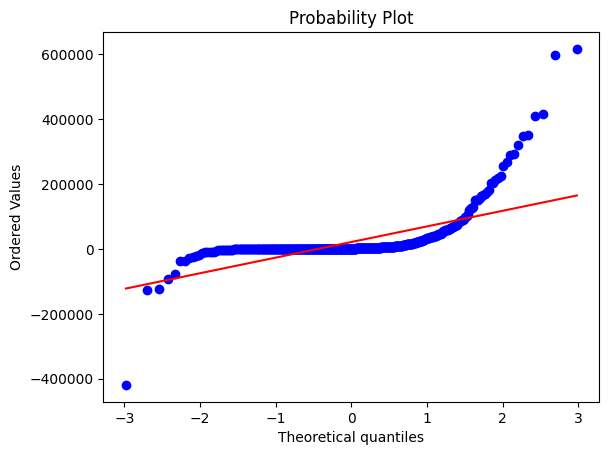

In [44]:
stats.probplot(daily_trading["Closed PnL"], dist="norm", plot=plt)
plt.show()

In [45]:
print(daily_trading['Closed PnL'].skew())
print(daily_trading['Closed PnL'].kurtosis())

3.7350671904064168
27.286786715229677


Observation -
  1. Skewness = 3.73 -> Right skewed
  2. Kurtosis = 27.286 -> very high (Normal distribution = 3)

So our data is not noramlly distributed.

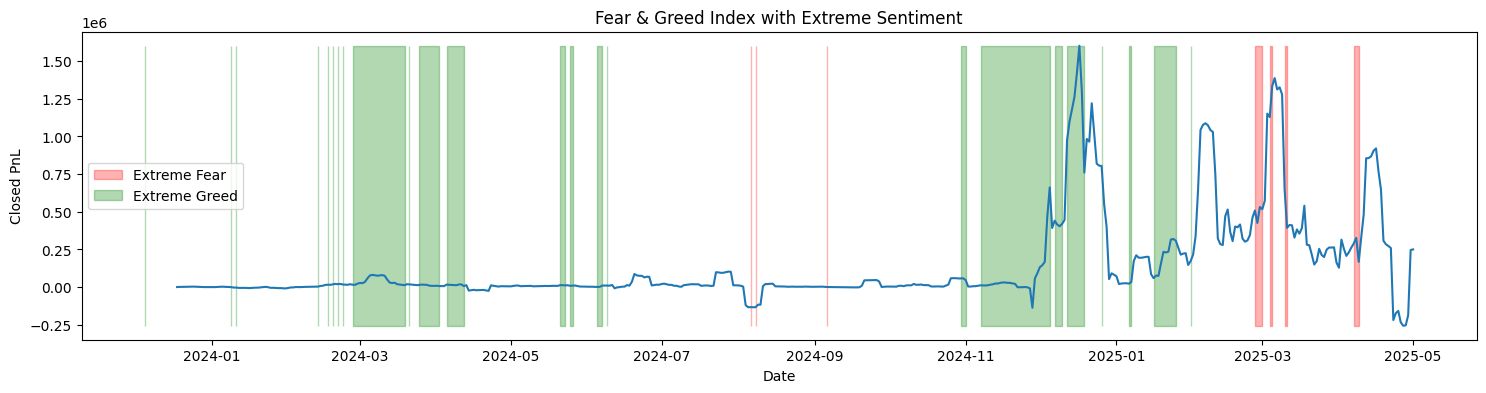

In [46]:
# Plotting the Closed PnL

plt.figure(figsize=(18,4))

# Execution Price rolling mean
df_price = df1.groupby(['date']).agg({'Closed PnL':'sum'}).rolling(window=7).sum().reset_index()
fg_index = df_price.merge(df2[['date','classification']])

high = df_price['Closed PnL'].max()
low = df_price['Closed PnL'].min()
plt.plot(df_price['date'], df_price['Closed PnL'])
# Highlight extreme fear periods
plt.fill_between(fg_index['date'], low, high,
                 where=(fg_index['classification'] == 'Extreme Fear'),
                 color='red', alpha=0.3, label='Extreme Fear')


# Highlight extreme greed periods
plt.fill_between(fg_index['date'], low, high,
                 where=(fg_index['classification'] == 'Extreme Greed'),
                 color='green', alpha=0.3, label='Extreme Greed')

plt.title('Fear & Greed Index with Extreme Sentiment')
plt.xlabel('Date')
plt.ylabel('Closed PnL')
plt.legend()
plt.show()


### Hypothesis testing to prove ->
Looking at the Moving average graph their is always an upward trend during Extreme Greed and an downward trend during Extreme Fear.
  
Conditions-

H₀ (null): Distribution of PnL in Greed = Distribution of PnL in Fear.

H₁ (alt): PnL in Greed > PnL in Fear (one-tailed test).

Since

In [47]:
pnl_Ext_Greed = daily_trading[daily_trading['classification'] == 'Extreme Greed']['Closed PnL']
pnl_Ext_Fear = daily_trading[daily_trading['classification'] == 'Extreme Fear']['Closed PnL']

In [48]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test
stat, p = mannwhitneyu(pnl_Ext_Greed, pnl_Ext_Fear, alternative="greater")

print("Mann-Whitney U Test:")
print("Statistic:", stat, "p-value:", p)

if p < 0.05:
    print("Reject H0 → Profitability in Greed is significantly higher than in Fear")
else:
    print("Fail to reject H0 → No significant difference")


Mann-Whitney U Test:
Statistic: 744.0 p-value: 0.6613315350636593
Fail to reject H0 → No significant difference


# Profitability Vs Sentiment Analysis

1. PnL performance during different sentiment periods
2. Success rate of trades in Fear vs Greed periods
3. Risk-adjusted returns by sentiment classification

### 1. PnL performance during different sentiment periods

 Perfroming a non parametric test on Close PnL

    Ho -> The distribution of Closed PnL is the same across all sentiment classes.

In [49]:
import pandas as pd
from scipy.stats import kruskal

# Group by sentiment
pnl_stats = daily_trading.groupby("classification")["Closed PnL"].agg(["mean", "median", "std", "count"])
print(pnl_stats)

# Kruskal-Wallis test (non-parametric, >2 groups)
groups = [group["Closed PnL"].values for name, group in daily_trading.groupby("classification")]
stat, p = kruskal(*groups)
print("Kruskal-Wallis test: stat=%.4f, p=%.4f" % (stat, p))


                        mean        median            std  count
classification                                                  
Extreme Fear    52793.589178  22561.739636  101262.394065     14
Extreme Greed   23817.292199   3127.536297   72827.301581    114
Fear            36891.818040   1412.314654   96611.848503     91
Greed           11140.566181    678.475928   62427.957949    193
Neutral         19297.323516   1818.573295   37995.209071     67
Kruskal-Wallis test: stat=20.0578, p=0.0005


### Observation -
Since, p < 0.05 --- So Our Null Hypo -> fails

i.e. PnL distributions are not the same across sentiment regimes.


Now since we got to know to PnL distribution are not same across different sentiment lets find out accross which sentiment ...

### Using Dunn's Test
 Dunn's test is a posthoc test that checks pairwise differences between groups

When ->
 - p-values close to 1.0 → no significant difference.
 - p < 0.05 → significant difference between those two groups.


In [50]:
import scikit_posthocs as sp

# Perform Dunn’s test with Bonferroni correction
posthoc = sp.posthoc_dunn(daily_trading, val_col="Closed PnL", group_col="classification", p_adjust='bonferroni')
print(posthoc)


               Extreme Fear  Extreme Greed      Fear     Greed   Neutral
Extreme Fear            1.0       1.000000  1.000000  1.000000  1.000000
Extreme Greed           1.0       1.000000  1.000000  0.000297  1.000000
Fear                    1.0       1.000000  1.000000  0.048185  1.000000
Greed                   1.0       0.000297  0.048185  1.000000  0.901682
Neutral                 1.0       1.000000  1.000000  0.901682  1.000000


### Observation -
So significant results we got are ->
  1. Greed vs Extreme Greed → p = 0.000297
  2. Greed vs Fear → p = 0.048185 (less significant)

  Remaning are not significant.

### 2. Success rate of trades in Fear vs Greed periods

In [51]:
import numpy as np
from scipy.stats import chi2_contingency

# Add success column
daily_trading["success"] = np.where(daily_trading["Closed PnL"] > 0, 1, 0)

# Success rate per sentiment
success_rate = daily_trading.groupby("classification")["success"].mean()
print(success_rate)

# Need for chi square -> How often did trades succeed under each sentiment?
# Contingency table for chi-square test
contingency = pd.crosstab(daily_trading["classification"], daily_trading["success"])
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi-square test: chi2=%.4f, p=%.4f" % (chi2, p))


classification
Extreme Fear     0.642857
Extreme Greed    0.877193
Fear             0.736264
Greed            0.725389
Neutral          0.671642
Name: success, dtype: float64
Chi-square test: chi2=13.7029, p=0.0083


### Observation -
1. Extreme Greed (87.7 %) - highest success rate -> i.e almost 88% of the traders are profitable during Extreme Greed.
2. Fear (73.6 %)
3. Greed (72.5 %)
4. Neutral (67.2 %)
3. Extreme Fear (64.3 %) - lowest success rate


Since, P-value > 0.5 -> We reject Ho,

That means sentiment classification and success rate are not independent → i.e. your chance of a trade being profitable does depend on the sentiment regime.


### 3. Risk-adjusted returns by sentiment classification

In [52]:
def risk_adj(x):
  if x.std() > 0:
    return x.mean() / x.std()
  else:
    return 0

risk_adjusted = daily_trading.groupby("classification")["Closed PnL"].apply(risk_adj)

print("Risk-adjusted returns per sentiment:")
print(risk_adjusted)


Risk-adjusted returns per sentiment:
classification
Extreme Fear     0.521354
Extreme Greed    0.327038
Fear             0.381856
Greed            0.178455
Neutral          0.507888
Name: Closed PnL, dtype: float64


### Observation -
Sharpe ratio to measure risk adjusted profitability

 - Higher is better (more profit per unit of risk/volatility).
 - Extreme Fear (0.52) & Neutral (0.51) → Best risk-adjusted outcomes.
 - Extreme Greed (0.33) & Fear (0.38) → Moderate efficiency.
 - Greed (0.18) → Worst efficiency (low returns relative to volatility).